### Najla Al-Hussien 


# Project(2): Investigating TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

I have chosen to look at the TMDb movies dataset for this project. 
This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

>**The qustions:** 
> 1. What were the months have the highest revenues ?
> 2. Which movies had highest and lowest profit?
> 3. Which features or properties can be associated with high ratings?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Wrangling

### General Properties

In [2]:
# Read file and explore column names 
movies = pd.read_csv('tmdb-movies.csv') 
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### (A) Data Cleaning (Drop not need column)

In this section, I drop the columns that are not useful for answering questions 

In [3]:
movies.drop(['homepage','tagline','keywords','overview','release_year'] , axis=1, inplace=True)
movies.columns 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
# Also remove production_companies 
movies.drop(['production_companies'], axis=1, inplace=True) 
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [5]:
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09


In [6]:
# Explore dataset 
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### (B) Data Cleaning (Filling 0 Values)

> Here, I want to get the average for each value that I need

In [7]:
# Get average of budget_adj
print(movies['budget_adj'].mean())

17551039.822886847


In [8]:
# Replace 0 values with mean.
movies['budget_adj'] = movies['budget_adj'].replace(0, 17551039.822886847)

In [9]:
# Get average of revenue_adj 
print(movies['revenue_adj'].mean())

51364363.25325093


In [10]:
# Replace 0 values with mean
movies['revenue_adj'] = movies['revenue_adj'].replace(0, 51364363.25325093)

In [11]:
# Get average of runtime 
print(movies['runtime'].mean())

102.07086324314375


In [12]:
# Replace 0 values with mean
movies['runtime'] = movies['runtime'].replace(0, 102.07086324314375) 

In [13]:
# check 
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.362065,217.389748,5.974922,2.675136e+07,7.980243e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,30.902781,575.619058,0.935142,3.050850e+07,1.365610e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### (C) Data Cleaning (Cleaning Duplicates)

Here, to remove duplicate rows

In [14]:
# 1- Find out if there are any duplicate rows
sum(movies.duplicated())

1

In [15]:
# 2- Remove that duplicated rows 
movies.drop_duplicates(inplace=True)

### (D) Data Cleaning (Changing Datatypes)

In [16]:
# 1- change release_date : datetime
movies ['release_date'] = pd.to_datetime(movies['release_date']) 
movies.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
budget_adj               float64
revenue_adj              float64
dtype: object

### (F) Data Cleaning (Changing format of budget and revenue column).


In [17]:
#printing the data type of the data set
movies.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
budget_adj               float64
revenue_adj              float64
dtype: object

In [18]:
change_type=['budget', 'revenue']
#changing data type
movies[change_type]=movies[change_type].applymap(np.int64)
#printing the changed information
movies.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
budget_adj               float64
revenue_adj              float64
dtype: object

## Exploratory Data Analysis

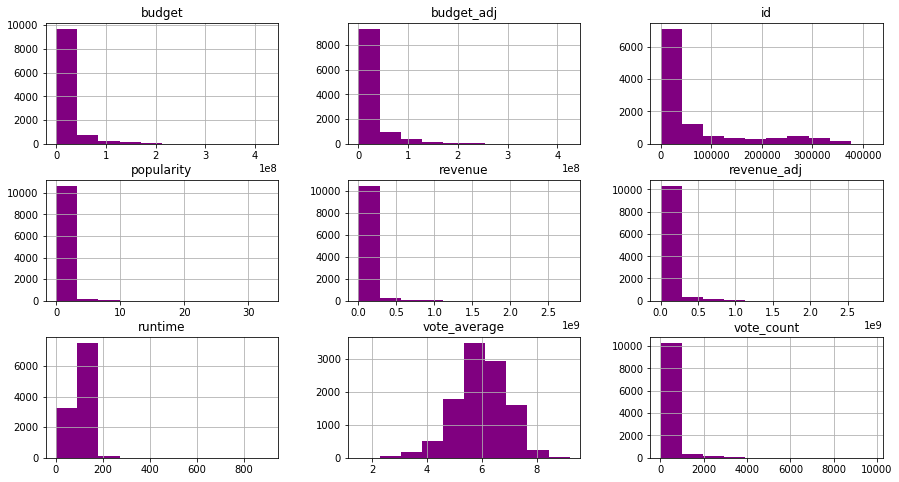

In [19]:
movies.hist(figsize=(15,8),color = 'purple');

### Question 1: What were the months have the highest revenues ?

>Here I'll describe which months for movies /shows have a highest revenue. 

In [20]:
# First, i'll create a new column called "month". 
# Then i'll extract the month from release_date.

movies['month'] = movies ['release_date'].apply(lambda x: x.month)

In [21]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,6
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08,5
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1.012000e+08,2.716190e+08,3
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,1.839999e+08,1.902723e+09,12
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,1.747999e+08,1.385749e+09,4


In [22]:
# Group by month and sum the revenues.
month_revenue = movies.groupby('month')['revenue_adj'].sum() 
month_revenue

month
1     4.910687e+10
2     4.235442e+10
3     6.385725e+10
4     5.487055e+10
5     8.423232e+10
6     1.021322e+11
7     7.987658e+10
8     5.757434e+10
9     6.804293e+10
10    7.424615e+10
11    8.171477e+10
12    1.091239e+11
Name: revenue_adj, dtype: float64

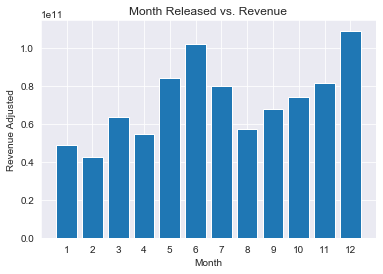

In [23]:
# Now plot these in a bar chart.
sns.set_style('darkgrid')
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], month_revenue, tick_label = [1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Month Released vs. Revenue')
plt.ylabel('Revenue Adjusted')
plt.xlabel('Month');

> This chart describe the highest revenue for movie releases in June and December.

### Question 2 : Which movies had highest and lowest profit?

> here shows, the movies had the highest and lowest profit

In [24]:
# 1. I'll calculating the profit of the each movie
movies.insert(2,'profit_earned',movies['revenue']- movies['budget'])
movies.head(2)

,id,imdb_id,profit_earned,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month
0,135397,tt0369610,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,6
1,76341,tt1392190,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08,5


In [25]:
# 2. I'll calculating highest and lowest profit:

import pprint
def calculate(column):
    #1:highest profit: 
    high=movies[column].idxmax()
    high_details=pd.DataFrame(movies.loc[high])
    
    #2: lowest profit:
    low= movies[column].idxmin()
    low_details=pd.DataFrame(movies.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info
   

In [26]:
# 3. Calculating profit: 
calculate('profit_earned')

,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
profit_earned,2544505847,-413912431
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100


> 1. The highest earned profit i.e (2544505847) in column with id 1386.
> 2. The lowest earned profit i.e (-413912431) in column with id 2244

### Question 3: Which features or properties can be associated with high ratings?


>I created scatter plot for runtime, popularity and budget_adj, in combination with the average rating to identify possible correlations.

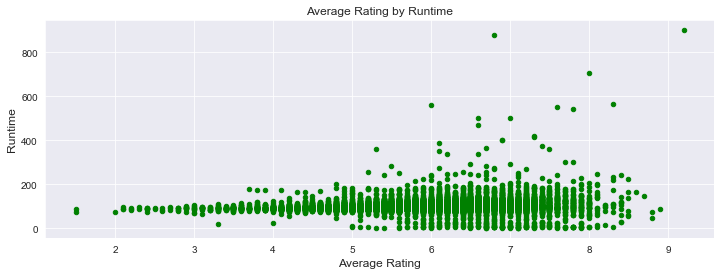

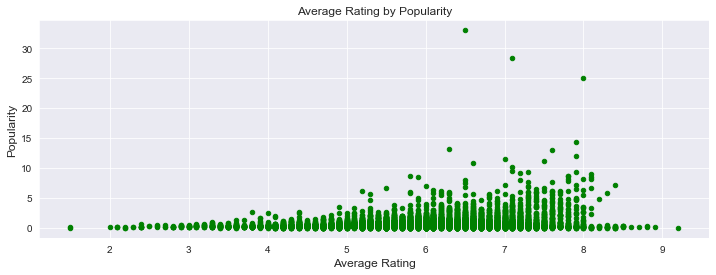

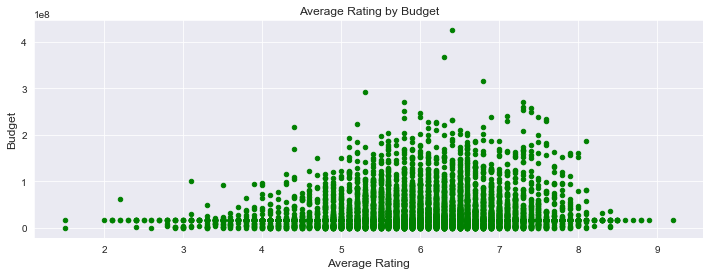

In [27]:
#1. Runtime: 
movies.plot(y='runtime', x='vote_average', kind='scatter', figsize=(12, 4), color = 'green')
plt.title('Average Rating by Runtime', fontdict={'fontsize': 12})
plt.xlabel('Average Rating', fontdict={'fontsize': 12})
plt.ylabel('Runtime', fontdict={'fontsize': 12});

#2. Popularity: 
movies.plot(y='popularity', x='vote_average', kind='scatter', figsize=(12, 4),color = 'green')
plt.title('Average Rating by Popularity', fontdict={'fontsize': 12})
plt.xlabel('Average Rating', fontdict={'fontsize': 12})
plt.ylabel('Popularity', fontdict={'fontsize': 12});

#3. Budget_adj: 
movies.plot(y='budget_adj', x='vote_average', kind='scatter', figsize=(12, 4),color = 'green')
plt.title('Average Rating by Budget', fontdict={'fontsize': 12})
plt.xlabel('Average Rating', fontdict={'fontsize': 12})
plt.ylabel('Budget', fontdict={'fontsize': 12});


> In these visualizations, a positive correlation between popularity and rating. 

## Conclusions

>  This was a very interesting data analysis. I came out with some very interesting facts about movies. 
so, After this analysis I can conclude following:
> - The best release a movie in June or December. 
> - The analysis describe the highest / lowest earned profit clearly. 
> - The analysis showed, that a positive correlation between popularity and rating. 

> Finally, some limitations in the dataset contains is zero values in some features.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255